# Inaugral Project

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    
- 3. [Pareto Improvements](#toc3_)    
  - 3.1. [Pareto improvements in Edgeworth box](#toc3_1_)    
- 4. [Market Clearing](#toc4_)    
  - 4.1. [Market Clearing Price](#toc4_1_)    
  - 4.2. [Consumer A has pricesetting power](#toc4_2_)    
- 5. [Consumer A is the market maker](#toc5_)    
  - 5.1. [Consumer A has no restrictions as market maker](#toc5_1_)    
- 6. [Social Planner](#toc6_)    
  - 6.1. [All allocations plotted](#toc6_1_)    
- 7. [Random initial allocation](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import numpy as np
import pandas as pd
import scipy.optimize as optimize
from scipy.optimize import fsolve
import random


%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [38]:
from ExchangeEconomy import ExchangeEconomyClass
from EconomyClassFlexible import ExchangeEconomyClassFlexible

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [39]:
model = ExchangeEconomyClass()

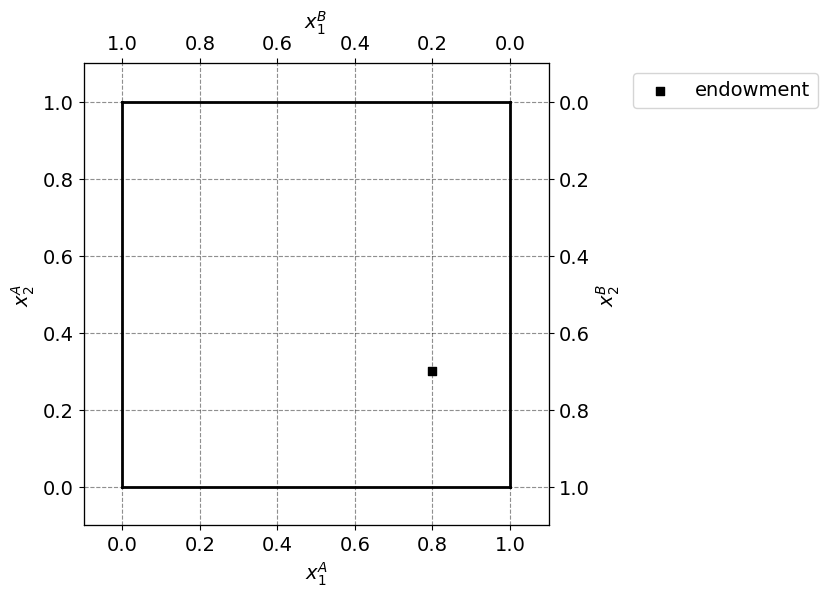

In [40]:

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1) 

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

## 3. <a id='toc3_'></a>[Pareto Improvements](#toc0_)

Here, I solve for the set C. That is, the set of Pareto improvements relative to the intial endowment.

In [41]:
# First, I define the defined possible holdings of goods 1 and 2 for consumer A. 

# Define N
N = 75

# Generate possible combinations of A's holding of the two goods:
step = 1 / N
x1A_values = [i * step for i in range(N + 1)]
x2A_values = [i * step for i in range(N + 1)]


# Now, I move on to solving for all possible Pareto improvements. I define a function that searches for all feasible Pareto improvements,
# and adds them to a set.

def find_pareto():
    pareto = []  # initializes an empty list
    for x1A in x1A_values:
        for x2A in x2A_values:
            # Calculate utilities for Agent A
            utility_A_current = model.utility_A(x1A, x2A)
            utility_B_current = model.utility_B(1 - x1A, 1 - x2A)

            # Check if it's a Pareto improvement
            if (utility_A_current >= model.utility_A(model.par.w1A, model.par.w2A) and
                utility_B_current >= model.utility_B(1-model.par.w1A, 1-model.par.w2A)):
                pareto.append((x1A, x2A))
    
    return pareto

# Call the function to find Pareto improvements, define the output as a set "improvements".
improvements = find_pareto()



### 3.1. <a id='toc3_1_'></a>[Pareto improvements in Edgeworth box](#toc0_)

Now, I move on to plotting improvements in an Edgeworth box

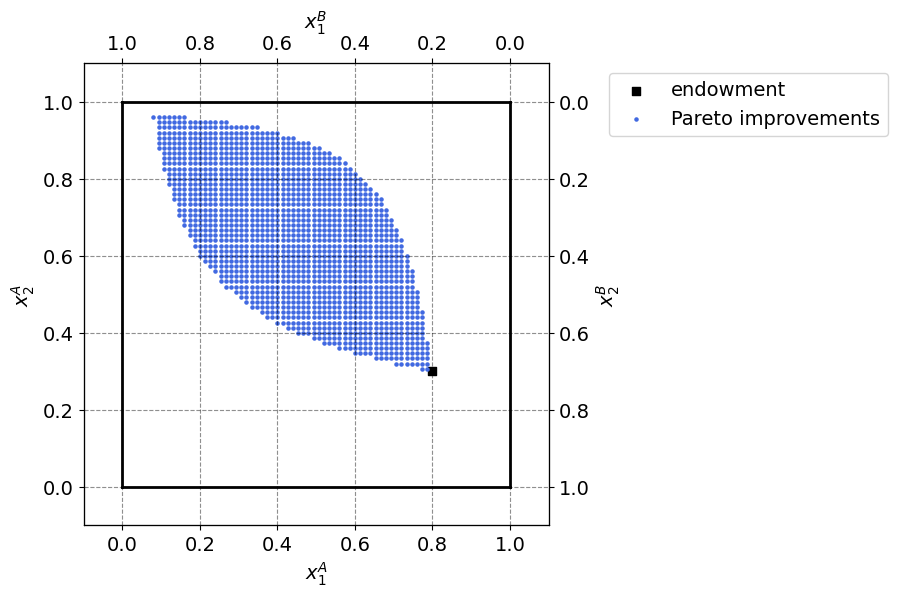

In [42]:

# First, i initialise the basic Edgeworth box:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1) 

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0))

# Now, the Pareto improvements are added:
# The label is added to the first scatter call for the Pareto improvements
first_improvement = True
for x1A, x2A in improvements:
    if first_improvement:
        ax_A.scatter(x1A, x2A, marker='o', color='royalblue', s=5, label='Pareto improvements')
        first_improvement = False
    else:
        ax_A.scatter(x1A, x2A, marker='o', color='royalblue', s=5)

# Adds a legend after all plotting
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.75, 1.0));

As can be seen from the plot, Pareto improvements are possible when Consumer A sells an amount of good 1 in exchange for an amount of good 2.

## 4. <a id='toc4_'></a>[Market Clearing](#toc0_)

I begin by defining a new instance of the walrasian economy:

[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666667, 1.1933333333333334, 1.2200000000000002, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333335, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7000000000000002, 1.7266666666666668, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333335, 1.86, 1.8866666666666667, 1.9133333333333333, 1.9400000000000002, 1.9666666666666668, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666

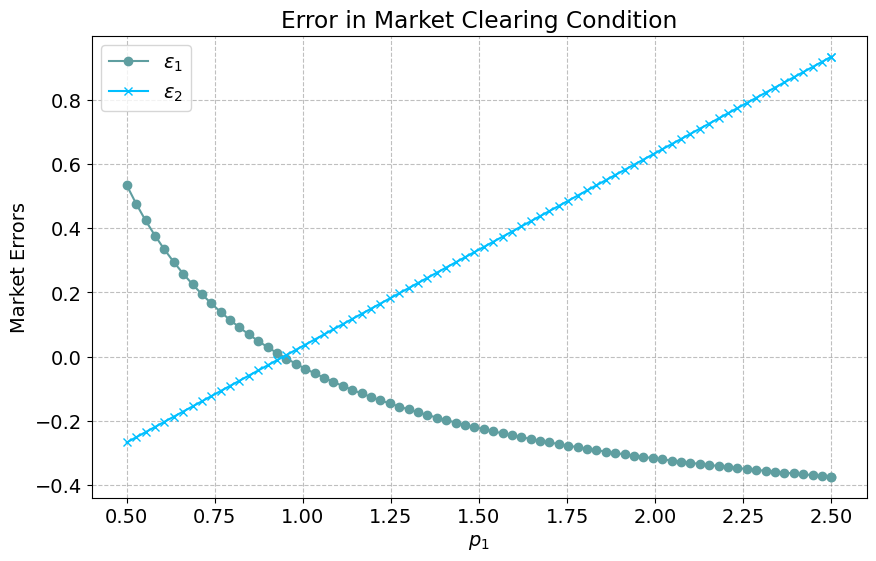

In [43]:
walras2 = ExchangeEconomyClass() 

# Define a range of p1 values
N = 75 

# Calculate the increment size
increment = 2 / N

# Generate the set of p1 values
p1_values = [0.5 + i * increment for i in range(N+1)]

# Include the upper bound (2.5) in the set
p1_values.append(2.5)


#Checks that all p1 values are consistent with the assignment
print(p1_values)




def find_market_errors(walras2, p1_values):
        errors = []
        for p1 in p1_values:
            eps1, eps2 = walras2.check_market_clearing(p1)
            errors.append((eps1, eps2))
        return errors


# Find market errors for each p1 value
market_errors = find_market_errors(walras2, p1_values)

# Now separating errors into eps1 and eps2 for plotting
eps1_values, eps2_values = zip(*market_errors)


# I then plot the market errors
plt.figure(figsize=(10, 6))
plt.plot(p1_values, eps1_values, label='$\epsilon_1$', marker='o', color='cadetblue')
plt.plot(p1_values, eps2_values, label='$\epsilon_2$', marker='x', color='deepskyblue')
plt.xlabel('$p_1$')
plt.ylabel('Market Errors')
plt.title('Error in Market Clearing Condition')
plt.legend()
plt.grid(True)
plt.show()


As seen from the graph, excess demand of good 1 ($\epsilon_1$) is positive at a low price of good 1, and falls as the price rises. Graphically, it is seen to be equal to zero at $p_1 \approx 0,9$

Conversely, excess demand of good 2 is negative at a low price of good 1, and rises as the price rises. The market clearing price for good 2 is also seen to be at $p_1 \approx 0,9$. This follows naturally in a Walrasian equillibrium, where the price that clears one market will also clear the other.

### 4.1. <a id='toc4_1_'></a>[Market Clearing Price](#toc0_)

Now, I search for the actual market clearing price. As mentioned, the price only needs to clear 1 market, and we know it will also clear the other. I take an approach of a grid search.

In [44]:
# Defines the range of p1 values for the search
lower_bound = 0.5
upper_bound = 2.5
N = 75
step = 2 / N


# Initializes variables to store market clearing price and minimum error
market_clearing_price = None
min_error = float('inf')

# Iterates over all possible values and find the one with minimum error
for p1 in np.arange(lower_bound, upper_bound + step, step):
    eps1, eps2 = walras2.check_market_clearing(p1)
    total_error = abs(eps1) + abs(eps2)
    if total_error < min_error:
        min_error = total_error
        market_clearing_price = p1

# Prints the market clearing price
if market_clearing_price is not None:
    print(f"Market clearing price of good 1: {market_clearing_price}")
else:
    print("Market clearing price not found within the specified range.")


# Now I find the resulting allocation given this price, and save for later display:

Q3_xA = walras2.demand_A(market_clearing_price)
Q3_xA = np.array(Q3_xA)

print(Q3_xA)


Market clearing price of good 1: 0.9533333333333325
[0.37156177 0.70844444]


As p2 is numeraire, the market price can be interpreted as a unit of good 1 valued at 95% of the value of good 2.

### 4.2. <a id='toc4_2_'></a>[Consumer A has pricesetting power](#toc0_)

If Consumer A has the ability to dictate prices, they will do so as to maximise their own utility. Once again, I utilise a grid search approach to iterate over $p_1 \in \mathcal{P}$. The optimal price depends on the demand function of Consumer B.

In [45]:

walras3 = ExchangeEconomyClass()

def utility_to_maximise(p1):
    # Calculate demand of agent B
    x1B, x2B = walras3.demand_B(p1)
    # Calculate utility for agent A
    u_A = walras3.utility_A(1 - x1B, 1 - x2B)
    # Return utility to maximize it
    return u_A

# Define the lower and upper bounds
lower_bound = 0.5
upper_bound = 2.5
N = 75
step = 2 / N

# Generate a sequence of discrete values for p1
p1_values = np.arange(lower_bound, upper_bound + step, step)

# Store the best result
best_p1 = None
best_utility = -np.inf

# Iterate over all possible values of p1
for p1 in p1_values:
    u_A = utility_to_maximise(p1)
    
    # Check if this utility is better than the best utility so far
    if u_A > best_utility:
        best_utility = u_A
        best_p1 = p1

print("Optimal p1:", best_p1)
print("Maximum utility for agent A:", best_utility)

# Now I find the resulting allocation given this price, and save for later display. 

Q4a_xB = walras2.demand_B(best_p1)
Q4a_xB = np.array(Q4a_xB)

# Calculate Q4a_xA using numpy operations
Q4a_xA = 1 - Q4a_xB

print(Q4a_xA)


Optimal p1: 1.886666666666664
Maximum utility for agent A: 0.6336159852375531
[0.61931684 0.64088889]


I note that the price is approximately double the market clearing price. This is due to Consumer A benefiting form a high price on good 1, as they are endowed with a large amount hereof initially. However, the price is not at the maximum of the set. Consumer A must weigh the benefit of increasing the price against the downside in decreasing demand for the good. Raising the price above this value results in a net loss due to falling demand.

Next, I determine the optimal price chosen by Consumer A when all (positive) prices are possible. As the demand function of Player B has not changed, the optimal price will intuitively be very near the optimal price from the set $\mathcal{P}$.

In [46]:


walras4 = ExchangeEconomyClass()

def utility_to_maximise(p1):
    # Calculate demand of agent B
    x1B, x2B = walras4.demand_B(p1)
    # Calculate utility for agent A
    u_A = walras4.utility_A(1 - x1B, 1 - x2B)
    # Return negative utility to maximize it
    return -u_A

# Bounds for p1, allowing any positive value
bounds = [(0, None)]

# Initial guess for p1
initial_guess = [0.94]

# Perform the optimization
result = optimize.minimize(utility_to_maximise, initial_guess, bounds=bounds)

# Extract the optimal value of p1
optimal_p1 = result.x[0]

# Extract the maximum utility value (note: it's the negative of the minimized value)
max_u_A = -result.fun

print("Optimal p1:", optimal_p1)
print("Maximum utility for agent A:", max_u_A)


# Now I find the resulting allocation given this price, and save for later display. 

Q4b_xB = walras2.demand_B(optimal_p1)
Q4b_xB = np.array(Q4a_xB)

# Calculate Q4a_xA using numpy operations
Q4b_xA = 1 - Q4a_xB

print(Q4b_xA)


Optimal p1: 1.899230380135457
Maximum utility for agent A: 0.6336208502900926
[0.61931684 0.64088889]


## 5. <a id='toc5_'></a>[Consumer A is the market maker](#toc0_)

Consumer A is now able to choose the consumption of Consumer B, so long as they are not left off worse than their initial endowment. That is, they must choose from the set of Pareto improvements.

In [47]:

walras5 = ExchangeEconomyClass()


# Define the function that is to be maximised and by which variables
def utility_to_maximise(x):
    # Unpack x into x1A and x2A
    x1A, x2A = x
    # Calculate utility for consumer A
    u_A = walras5.utility_A(x1A, x2A)
    # Return negative utility to maximize it
    return -u_A


best_result = None
best_utility = -float('inf')

# Evaluate the utility for each pair in the set of pareto improvements
for x1A, x2A in improvements:
    # Calculate the utility for this pair
    utility = -utility_to_maximise((x1A, x2A))

    if utility > best_utility:
        best_utility = utility
        best_result = (x1A, x2A)

# Extract the optimal value of x1A and x2A from the best result
optimal_x1A, optimal_x2A = best_result

print("Optimal x1A:", optimal_x1A)
print("Optimal x2A:", optimal_x2A)
print("Maximum utility for agent A:", best_utility)

# Now I find the resulting allocation given this price, and save for later display. 

Q5a_xA = [optimal_x1A, optimal_x2A]
Q5a_xA = np.array(Q5a_xA)

print(Q5a_xA)



Optimal x1A: 0.56
Optimal x2A: 0.8533333333333334
Maximum utility for agent A: 0.7415523509091093
[0.56       0.85333333]


### 5.1. <a id='toc5_1_'></a>[Consumer A has no restrictions as market maker](#toc0_)

Consumer A is now able to choose any allocation in which Consumer B is not left worse off. Intuitively, this should be the same result as the set of Pareto improvements, but we will solve it anyway:

In [48]:

walras6 = ExchangeEconomyClass()

# Utility function for consumer A to be maximized
def utility_to_maximise(x):
    x1A, x2A = x
    u_A = walras6.utility_A(x1A, x2A)
    return -u_A  # Return negative to maximize

# Constraint function for consumer B's utility
def constraint_B(x):
    x1A, x2A = x
    x1B, x2B = 1 - x1A, 1 - x2A  
    u_B = walras6.utility_B(x1B, x2B)
# Make sure it is not smaller than the utility from the initial endowment.
    return u_B - walras6.utility_B(walras6.par.w1B,walras6.par.w2B) 

# Bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess for x1A and x2A
initial_guess = [0.8, 0.8]

# Define the constraints in the form required by scipy.optimize
constraints = {
    'type': 'ineq',  # Inequality constraint
    'fun': constraint_B
}

# Perform the optimization
result = optimize.minimize(utility_to_maximise, initial_guess, bounds=bounds, constraints=constraints)

# Extract the optimal values of x1A and x2A
optimal_x1A, optimal_x2A = result.x

# Extract the maximum utility value for agent A (note: it's the negative of the minimized value)
max_u_A = -result.fun

print("Optimal x1A:", optimal_x1A)
print("Optimal x2A:", optimal_x2A)
print("Maximum utility for agent A:", max_u_A)

Q5b_xA = [optimal_x1A, optimal_x2A]
Q5b_xA = np.array(Q5b_xA)

print(Q5b_xA)

Optimal x1A: 0.5755926988390128
Optimal x2A: 0.8445498835544877
Maximum utility for agent A: 0.7432278295196013
[0.5755927  0.84454988]


The allocation is found to be very similiar to the one from the previous set.


## 6. <a id='toc6_'></a>[Social Planner](#toc0_)

In [49]:
walras7 = ExchangeEconomyClass()


# Define the function that is to be maximised and by which variables
def utility_to_maximise(x):
    # Unpack x into x1A and x2A
    x1A, x2A = x
    # Calculate utility for consumer A
    u_A = walras7.utility_A(x1A, x2A)
    # Calculate utiltiy for consumer B:
    u_B = walras7.utility_B(1-x1A, 1-x2A)
    # Return negative utility to maximize it
    return -(u_A+u_B)


best_result = None
best_utility = -float('inf')

# Evaluate the utility for each pair in the set of pareto improvements
for x1A, x2A in improvements:
    # Calculate the utility for this pair
    utility = -utility_to_maximise((x1A, x2A))

    if utility > best_utility:
        best_utility = utility
        best_result = (x1A, x2A)

# Extract the optimal value of x1A and x2A from the best result
optimal_x1A, optimal_x2A = best_result

# Resulting utility for Consumer A and B
best_utility_a = walras7.utility_A(optimal_x1A,optimal_x2A)
best_utility_b = walras7.utility_B(1-optimal_x1A,1-optimal_x2A)

print("Optimal x1A:", optimal_x1A)
print("Optimal x2A:", optimal_x2A)
print("Maximum utility for agent A:", best_utility_a)
print("Maximum utility for agent B:", best_utility_b)

Q6a_xA = [optimal_x1A, optimal_x2A]
Q6a_xA = np.array(Q6a_xA)

print(Q6a_xA)

Optimal x1A: 0.33333333333333337
Optimal x2A: 0.6666666666666667
Maximum utility for agent A: 0.5291336839893999
Maximum utility for agent B: 0.5291336839893998
[0.33333333 0.66666667]


### 6.1. <a id='toc6_1_'></a>[All allocations plotted](#toc0_)

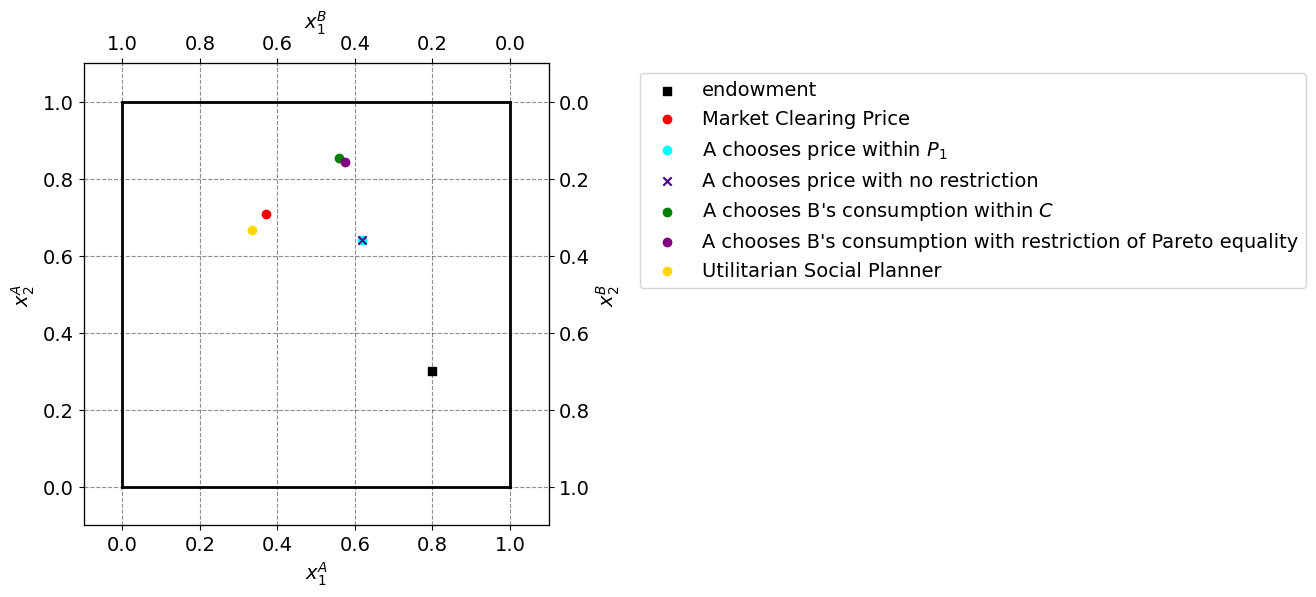

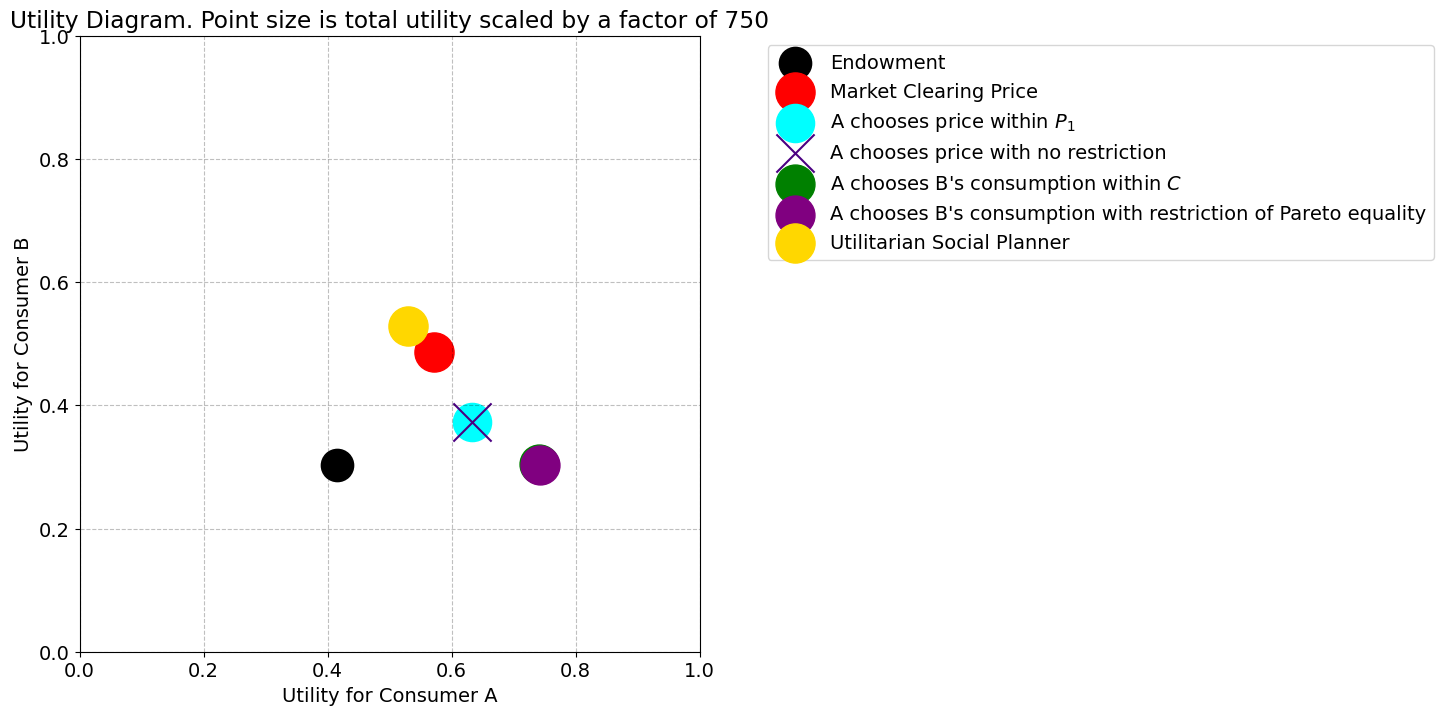

In [50]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1) 

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# Now I add the values from Q3-Q6:

Q3_x1A, Q3_x2A = Q3_xA

ax_A.scatter(Q3_x1A, Q3_x2A, marker='o', color='red', label='Market Clearing Price')

Q4a_x1A, Q4a_x2A = Q4a_xA

ax_A.scatter(Q4a_x1A, Q4a_x2A, marker='o', color='cyan', label='A chooses price within $P_1$')

Q4b_x1A, Q4b_x2A = Q4b_xA

ax_A.scatter(Q4b_x1A, Q4b_x2A, marker='x', color='indigo', label='A chooses price with no restriction')

Q5a_x1A, Q5a_x2A = Q5a_xA

ax_A.scatter(Q5a_x1A, Q5a_x2A, marker='o', color='green', label="A chooses B's consumption within $C$")


Q5b_x1A, Q5b_x2A = Q5b_xA

ax_A.scatter(Q5b_x1A, Q5b_x2A, marker='o', color='purple', label="A chooses B's consumption with restriction of Pareto equality")



Q6a_x1A, Q6a_x2A = Q6a_xA

ax_A.scatter(Q6a_x1A, Q6a_x2A, marker='o', color='gold', label='Utilitarian Social Planner')


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(2.65,1.0))
;



# I now calculate the utilities from the allocations:

util = ExchangeEconomyClass()

endowmentutilA = util.utility_A(util.par.w1A, util.par.w2A)
endowmentutilB = util.utility_B(1-util.par.w1A, 1-util.par.w2A)

Q3utilA = util.utility_A(Q3_x1A, Q3_x2A)
Q3utilB = util.utility_B(1-Q3_x1A, 1-Q3_x2A)

Q4autilA = util.utility_A(Q4a_x1A, Q4a_x2A)
Q4autilB = util.utility_B(1-Q4a_x1A, 1-Q4a_x2A)

Q4butilA = util.utility_A(Q4b_x1A, Q4b_x2A)
Q4butilB = util.utility_B(1-Q4b_x1A, 1-Q4b_x2A)

Q5autilA = util.utility_A(Q5a_x1A, Q5a_x2A)
Q5autilB = util.utility_B(1-Q5a_x1A, 1-Q5a_x2A)

Q5butilA = util.utility_A(Q5b_x1A, Q5b_x2A)
Q5butilB = util.utility_B(1-Q5b_x1A, 1-Q5b_x2A)

Q6autilA = util.utility_A(Q6a_x1A, Q6a_x2A)
Q6autilB = util.utility_B(1-Q6a_x1A, 1-Q6a_x2A)


def calculate_sizes(utilA, utilB):
    return ((utilA + utilB)) *750


# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Define utility data along with their colors, labels, and markers
utilities = {
    'endowment': {'utilA': endowmentutilA, 'utilB': endowmentutilB, 'color': 'black', 'label': 'Endowment', 'marker': 'o'},
    'Q3': {'utilA': Q3utilA, 'utilB': Q3utilB, 'color': 'red', 'label': 'Market Clearing Price', 'marker': 'o'},
    'Q4a': {'utilA': Q4autilA, 'utilB': Q4autilB, 'color': 'cyan', 'label': 'A chooses price within $P_1$', 'marker': 'o'},
    'Q4b': {'utilA': Q4butilA, 'utilB': Q4butilB, 'color': 'indigo', 'label': 'A chooses price with no restriction', 'marker': 'x'},
    'Q5a': {'utilA': Q5autilA, 'utilB': Q5autilB, 'color': 'green', 'label': "A chooses B's consumption within $C$", 'marker': 'o'},
    'Q5b': {'utilA': Q5butilA, 'utilB': Q5butilB, 'color': 'purple', 'label': "A chooses B's consumption with restriction of Pareto equality", 'marker': 'o'},
    'Q6a': {'utilA': Q6autilA, 'utilB': Q6autilB, 'color': 'gold', 'label': 'Utilitarian Social Planner', 'marker': 'o'}
}

# Scatter plot for each case
for key, data in utilities.items():
    utilA = data['utilA']
    utilB = data['utilB']
    color = data['color']
    label = data['label']
    marker = data['marker']
    sizes = calculate_sizes(utilA, utilB)
    ax.scatter(utilA, utilB, marker=marker, color=color, label=label, s=sizes)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])


# Set labels and title
ax.set_xlabel('Utility for Consumer A')
ax.set_ylabel('Utility for Consumer B')
ax.set_title('Utility Diagram. Point size is total utility scaled by a factor of 750')

# Add grid
ax.grid(True)

# Add legend
ax.legend(frameon=True,loc='upper right',bbox_to_anchor=(2.2,1.0))

# Show the plot
plt.show()

In the first diagram, we see that in every allocation, we see that consumer A reduces his holding of good 1, exchanging it for an amount of good 2. This is expected, as consumer A prefers good 1, while consumer B prefers good 2. They therefore both have an interest in achieving an allocation where consumer A gains more of good 1, and consumer B gains more of good 2.

In the second diagram, we see the utility of consumer A & B, as well as the relative total utility (size of the points).

We see that consumer A is best off when they are the market maker, choosing the consumption of Consumer B, only restricted to achieving a Pareto improvement.

All other options are seemlingly a TU improvement to the endowment. Consumer B is best off when the Social Planner decides. This makes sense, as all other outcomes are based on Consumer A maximising their own utility under different restrictions, with no regard for Consumer B.

The market clearing price is not far off from the social planner outcome, neither in allocation nor total utility. The difference comes from Consumer A's larger total endowment, which allows them to force a price level that is more favourable to them, compared to the socially optimal outcome.

## 7. <a id='toc7_'></a>[Random initial allocation](#toc0_)

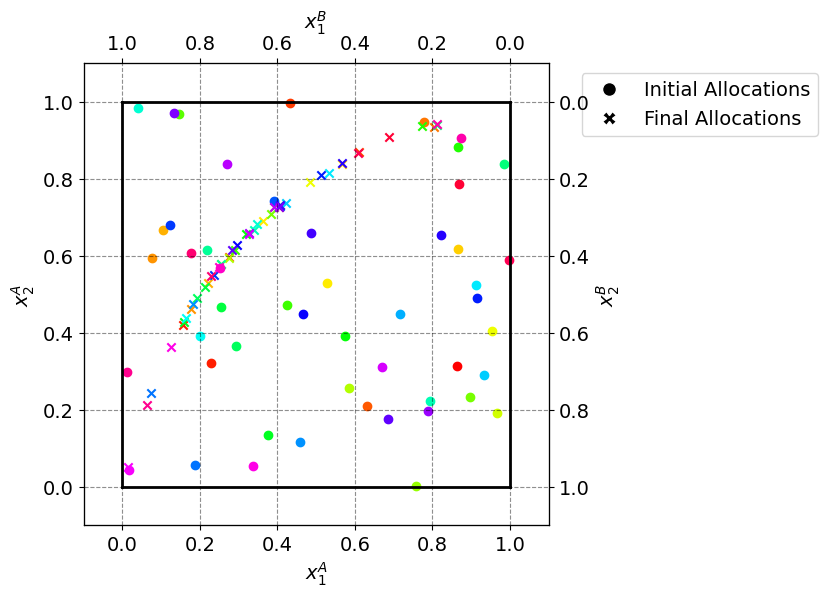

In [51]:

# Generate 50 random pairs of (w1A, w2A)
random_allocations = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(50)]

# Define the range of p1 values for the search
lower_bound = 0.5
upper_bound = 2.5
N = 75
step = 2 / N

# Store results
results = []

# Iterate over each random initial allocation
for i, (w1A, w2A) in enumerate(random_allocations):
    # Create an instance of the ExchangeEconomyClassFlexible class
    walras = ExchangeEconomyClassFlexible(w1A, w2A)
    
    # Initialize variables to store market clearing price and minimum error
    market_clearing_price = None
    min_error = float('inf')

    # Iterate over all possible values and find the one with minimum error
    for p1 in np.arange(lower_bound, upper_bound + step, step):
        eps1, eps2 = walras.check_market_clearing(p1)
        total_error = abs(eps1) + abs(eps2)
        if total_error < min_error:
            min_error = total_error
            market_clearing_price = p1

    # Find the resulting allocation given the market clearing price
    if market_clearing_price is not None:
        xA = walras.demand_A(market_clearing_price)
        xB = walras.demand_B(market_clearing_price)
        results.append((w1A, w2A, market_clearing_price, xA, xB))
    else:
        results.append((w1A, w2A, None, None, None))

# Plot the allocations in the Edgeworth box only once
fig, ax_A = plt.subplots(figsize=(6, 6), dpi=100)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Limits and initial endowment point
w1bar = 1.0
w2bar = 1.0

# Plot limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

cmap = plt.get_cmap("hsv") 
num_results = len(results)

# Plot all results in one graph
for i, (w1A, w2A, market_clearing_price, xA, xB) in enumerate(results):
    if market_clearing_price is not None:
        color = cmap(i / num_results)  # Get a new color for each pair
        ax_A.scatter(w1A, w2A, marker='o', color=color, label=f'Initial Allocations {i+1}')
        ax_A.scatter(xA[0], xA[1], marker='x', color=color, label=f'Final Allocations {i+1}')


initial_allocation_marker = plt.Line2D([0], [0], marker='o', color='w', label='Initial Allocations',
                                       markerfacecolor='black', markersize=10)
final_allocation_marker = plt.Line2D([0], [0], marker='X', color='w', label='Final Allocations',
                                     markerfacecolor='black', markersize=10)

ax_A.legend(handles=[initial_allocation_marker, final_allocation_marker],frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.show()




We see that the final allocations seem to follow a pattern. This arises from the utility functions, where Consumer A preferes good 2, and consumer B prefers good 1. The placement on this "market outcome" line depends on the initial market power of both consumers. The stronger consumer A is relative to B, the more of the final allocation goes to consumer A.